# Classifies S1s and S2s based on the ratio of the 10% area width to the 50% width 

In [1]:
import numpy as np
# This just ensures some comments in dataframes below display nicely
import pandas as pd
pd.options.display.max_colwidth = 100

In [2]:
import straxen
st = straxen.contexts.strax_workshop_dali()   #Workshop

In [3]:
straxen.download_test_data()

In [66]:
st.search_field('n_channels') 

n_channels is part of peak_basics (provided by PeakBasics)


In [5]:
st.select_runs('*ba*')

Checking data availability: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


,end,mode,name,number,reader.ini.name,start,tags,trigger.events_built,event_info_available,peaks_available,raw_records_available,events_available,records_available
1,2017-06-21 07:17:25+00:00,background_stable,170621_0617,10635,background_stable,2017-06-21 06:17:24+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",19084.0,True,True,True,True,True
2,2018-02-15 10:30:55+00:00,background_triggerless,180215_1029,16854,background_triggerless,2018-02-15 10:29:52+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",858.0,True,True,True,True,True
3,2018-02-16 14:24:47+00:00,background_triggerless,180216_1324,16887,background_triggerless,2018-02-16 13:24:43+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
4,2018-02-16 15:55:09+00:00,background_triggerless,180216_1455,16889,background_triggerless,2018-02-16 14:55:06+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
5,2018-02-16 17:25:29+00:00,background_triggerless,180216_1625,16891,background_triggerless,2018-02-16 16:25:26+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
6,2018-02-17 00:57:19+00:00,background_triggerless,180216_2357,16901,background_triggerless,2018-02-16 23:57:16+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
7,2018-02-17 02:27:41+00:00,background_triggerless,180217_0127,16903,background_triggerless,2018-02-17 01:27:38+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
8,2018-02-17 03:58:03+00:00,background_triggerless,180217_0257,16905,background_triggerless,2018-02-17 02:58:00+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
9,2018-02-17 05:28:23+00:00,background_triggerless,180217_0428,16907,background_triggerless,2018-02-17 04:28:20+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
10,2018-02-17 06:28:35+00:00,background_triggerless,180217_0528,16908,background_triggerless,2018-02-17 05:28:32+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True


In [6]:
run_id = '180215_1029'

In [7]:
df = st.get_df(run_id, 'event_info')

In [123]:
import strax
import numpy as np
export, __all__ = strax.exporter()

@export
@strax.takes_config(
    strax.Option('min_channels', default=3,
                 help="Minimum Coincident Channels for S1 or S2 candidate"),
    strax.Option('s1_area_ratio', default=0.8,
                 help="Minimum Ratio of inner 10% area width to 50% area width to be considered an s1")
                    )

class PeakClassing(strax.Plugin):
    """Everything is an S1!"""
    
    # Name of the data type this plugin provides
    provides = 'peak_classification'
    
    # Data types this plugin requires. Note we don't specify
    # what plugins should produce them: maybe the default PeakBasics
    # has been replaced by another AdvancedExpertBlabla plugin?
    depends_on = ('peak_basics','peaks')
    
    # Numpy datatype of the output 
    dtype = straxen.plugins.plugins.PeakClassification.dtype
    
    # Version of the plugin. Increment this if you change the algorithm.
    __version__ = '0.0.2'

    def compute(self, peaks):
        p = peaks
        r = np.zeros(len(p), dtype=self.dtype)
        is_s1 = p['n_channels'] >= self.config['min_channels']
        is_s1 &= p['width'][:,1]/p['width'][:,5] >= self.config['s1_area_ratio']
        is_s2 = p['n_channels'] >= self.config['min_channels']
        is_s2 &= p['width'][:,1]/p['width'][:,5] < self.config['s1_area_ratio']
        is_lone = p['n_channels'] == 1
        #is_unknown = is_unknown['n_channels'] != 1
        r['type'][is_s1] = 1
        r['type'][is_s2] = 2
        r['type'][is_lone] = 0
        #r['type'][is_unknown] = 3
        return r
   

In [124]:
PeakClassing.dtype

[('type', numpy.int8, 'Classification of the peak.')]

In [125]:
#st.register(PeakClassing)

In [126]:
df2 = st.get_df(run_id, 'event_info',
               register=PeakClassing , 
               #config=dict(s1_area_ratio = 0)
               )


/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater_equal
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less


In [127]:
df2.head(3)

,event_number,time,endtime,n_peaks,drift_time,s1_index,s1_area,s1_area_fraction_top,s1_range_50p_area,s1_n_competing,...,r,z_naive,r_naive,r_field_distortion_correction,theta,cs1,cs2,e_light,e_charge,e_ces
0,0,1518690592149882950,1518690592152169230,15,0,-1,0.0,0.0,0.0,0,...,41.682030,-0.0,41.780281,-0.098253,-0.153706,0.0,422131.187500,0.0,500.709717,0.0
1,1,1518690592201439780,1518690592203705700,22,0,-1,0.0,0.0,0.0,0,...,40.960560,-0.0,42.668930,-1.708371,-2.720621,0.0,379286.343750,0.0,449.889435,0.0
2,2,1518690592466567450,1518690592468821200,125,0,-1,0.0,0.0,0.0,0,...,48.675816,-0.0,39.407043,9.268770,3.073643,0.0,66288.335938,0.0,78.627724,0.0


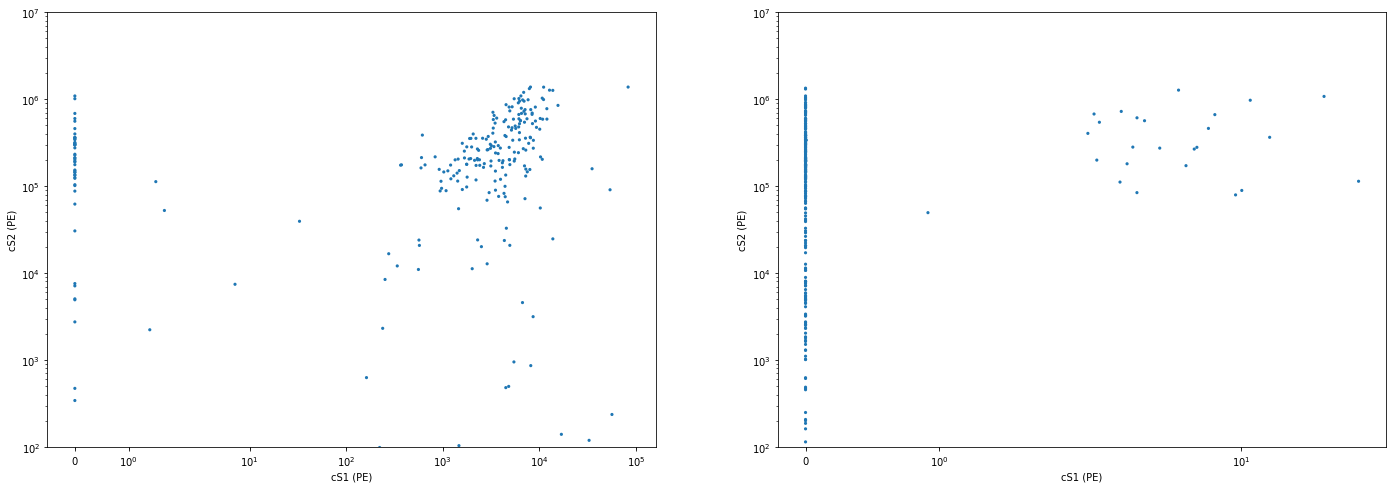

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

def event_plot(df):
    plt.scatter(df.cs1, df.cs2,
                #c=df.s1_area_fraction_top,
                vmin=0, vmax=0.3, 
                s=10,
                #cmap=plt.cm.jet,
                marker='o', edgecolors='none')
    #plt.colorbar(label="S1 area fraction top", extend='max')
    plt.xlabel('cS1 (PE)')
    plt.ylabel('cS2 (PE)')
    plt.xscale('symlog')
    plt.yscale('log')
    plt.ylim(1e2, 1e7)
f = plt.figure(figsize=(24,8))
    
plt.subplot(1,2,1)    
event_plot(df)

plt.subplot(1,2,2)
event_plot(df2)

plt.show()